# Phương trình tay máy

In [55]:
import numpy as np
a_s = [79.99202019855866, 38.16140276531835, 55.58261128955843]


a_r0 = (a_s[0]*np.pi)/180
a_r1 = (a_s[1]*np.pi)/180
a_r2 = (a_s[2]*np.pi)/180


print("input :", a_r0, a_r1, a_r2)
q1 = np.pi/2 - a_r0
q2 = a_r1
q3 = a_r2 + a_r1
L0 = 7.5
L1 = 8
L2 = 11.5



x = L1*np.cos(q2)*np.cos(q1) + L2*np.cos(q3-q2)*np.cos(q1)
y = L1*np.cos(q2)*np.sin(q1) + L2*np.cos(q3-q2)*np.sin(q1)
z = L1*np.sin(q2) - L2*np.sin(q3-q2) + L0

print(x, y, z)

input : 1.396124127786657 0.6660421254344742 0.9700995738589658
12.595565319715629 2.222746821126286 2.956197927537474


In [56]:
x, y, z = 12.595565319715629, 2.222746821126286, 2.956197927537474
# x 4 - 13
# y = 4 - 10
# z = 0 - 5

a_1 = np.arctan(y/x)

n = z-L0
m = x*np.cos(a_1) + y*np.sin(a_1)

a_3 = np.arccos((np.power(m,2) + np.power(n,2) - np.power(L1,2) - np.power(L2,2))/(2*L1*L2))

u = L1 + L2*np.cos(a_3)
v = L2 * np.sin(a_3)

a_2 = np.arccos((u*m-v*n)/(u**2 + v**2))

a_r0 = np.pi/2 - a_1
a_r1 = a_2 
a_r2 = a_3 - a_2
# a_r0 = a_1
# a_r1 = a_2 
# a_r2 = a_3 

print(a_r0*180/np.pi, a_r1*180/np.pi, a_r2*180/np.pi)

79.99202019855866 38.161402765318364 55.58261128955843


# Xử lý dữ liệu ảnh

In [1]:
import cv2

import numpy as np


# Create a VideoCapture object

cap = cv2.VideoCapture("C:/Users/Hero/OneDrive/Máy tính/video.mp4")


# Check if camera opened successfully

if (cap.isOpened() == False): 

  print("Unable to read camera feed")


frame_width = int(cap.get(3))
frame_height = int(cap.get(4))


# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.

out = cv2.VideoWriter('outpy.mp4',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))


while(True):

  ret, frame = cap.read()


  if ret == True: 
    out.write(frame)
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):

      break
  else:

    break 
cap.release()

out.release()

cv2.destroyAllWindows() 

# Xử lý dữ liệu bảng 

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("D:/User/DLBot/scripts/data/angles.csv")
# df.head()
data = np.array(df)
X = np.array(data[:,0:8], dtype=np.double)/400
y = np.array(data[:,8:12], dtype=np.double)*np.pi/180

In [62]:
L0 = 7.5
L1 = 8
L2 = 11.5
def donghocthuan(q):
    q1 = np.pi/2 - q[0]
    q2 = q[1]
    q3 = q[2] + q[1]
    x = L1*np.cos(q2)*np.cos(q1) + L2*np.cos(q3-q2)*np.cos(q1)
    y = L1*np.cos(q2)*np.sin(q1) + L2*np.cos(q3-q2)*np.sin(q1)
    z = L1*np.sin(q2) - L2*np.sin(q3-q2) + L0
    return x, y, z, q[3]

def donghocnguoc(x, y, z):
    a_1 = np.arctan(y/x)

    n = z-L0
    m = x*np.cos(a_1) + y*np.sin(a_1)

    a_3 = np.arccos((m**2 + n**2 - L1**2 - L2**2)/(2*L1*L2))

    u = L1 + L2*np.cos(a_3)
    v = L2 * np.sin(a_3)

    a_2 = np.arccos((u*m-v*n)/(u**2 + v**2))

    a_r0 = np.pi/2 - a_1
    a_r1 = a_2 
    a_r2 = a_3 - a_2

    return int(a_r0*180/np.pi), int(a_r1*180/np.pi), int(a_r2*180/np.pi)

def center_box(box):
    x, y = box[0]+(box[2] - box[0])/2, box[1]+(box[3] - box[1])/2
    w, h = (box[2] - box[0]), (box[3] - box[1])
    return x, y, w, h

In [63]:
data_create = []
for idx, dta in enumerate(X):
    box_1, box_2 = dta[:4], dta[4:]
    # x, y, w, h = center_box(box_1)
    # print(x,y,w,h)
    # print(idx)
    data_frame = np.hstack(
                        [center_box(box_1), center_box(box_2), donghocthuan(y[idx])])
    data_create.append(data_frame)
# df = pd.read_csv("D:/User/DLBot/scripts/data/angles_pro.csv")
df2 = pd.DataFrame(data_create, columns=['x1','y1','w1','h1','x2','y2','w2','h2','a1','a2','a3','a4'])
# df2 = pd.concat([df, df2])
df2.to_csv(
    "D:/User/DLBot/scripts/data/angles_pro.csv", index=False)
data_create

[array([0.895     , 0.53375   , 0.21      , 0.6025    , 0.8875    ,
        0.5       , 0.22      , 0.515     , 9.09478447, 0.63596928,
        2.05976227, 0.29670597]),
 array([ 0.275     ,  0.63125   ,  0.455     ,  0.3125    ,  0.71      ,
         0.5575    ,  0.34      ,  0.26      , 10.76059413, -4.34756224,
         0.99422724,  0.33161256]),
 array([ 0.45375   ,  0.64875   ,  0.4025    ,  0.2675    ,  0.795     ,
         0.58875   ,  0.34      ,  0.2275    ,  9.19468333, -2.46370797,
        -0.11677341,  0.29670597]),
 array([ 0.30375   ,  0.64625   ,  0.3525    ,  0.2425    ,  0.765     ,
         0.575     ,  0.295     ,  0.205     , 10.57439037, -3.6410546 ,
         0.07448095,  0.31415927]),
 array([0.9375    , 0.3025    , 0.12      , 0.425     , 0.88875   ,
        0.2625    , 0.2175    , 0.49      , 7.81343408, 0.95936907,
        2.91762645, 0.31415927]),
 array([ 0.5325    ,  0.3775    ,  0.34      ,  0.255     ,  0.92125   ,
         0.35      ,  0.1575    ,  0.2   

In [2]:
def create_batch_data(Train_X, Train_y, batch):
    X, y = [], []
    XX, yy = [], []
    j=0
    while j < len(Train_y):
        X.append(Train_X[j])
        y.append(Train_y[j])
        if (j+1)%batch==0:
            XX.append(X)
            yy.append(y)
            X, y = [], []
        j+=1
    return np.array(XX), np.array(yy)

# Training

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from model_ANN import ANN
import torch.nn as nn
import tqdm
import torch

df = pd.read_csv("D:/User/DLBot/scripts/data/angles.csv")
# df.head()
data = np.array(df)
X = np.array(data[:,0:8], dtype=np.double)/400
y = np.array(data[:,8:12], dtype=np.double)*np.pi/180

Train_X, Val_X, Train_y, Val_y = train_test_split(X, y, test_size=0.2)
X_train, y_train = create_batch_data(Train_X, Train_y, 64)
X_val, y_val = create_batch_data(Val_X, Val_y, 64)
X_val

array([[[0.    , 0.385 , 0.4   , 0.7275, 0.335 , 0.37  , 0.665 , 0.615 ],
        [0.0275, 0.23  , 0.4625, 0.54  , 0.4025, 0.105 , 0.7525, 0.375 ],
        [0.445 , 0.545 , 0.9725, 0.9025, 0.5725, 0.5025, 1.    , 0.8325],
        [0.005 , 0.57  , 0.63  , 0.9975, 0.2525, 0.505 , 0.69  , 0.8025],
        [0.01  , 0.565 , 0.6875, 0.9975, 0.265 , 0.505 , 0.71  , 0.795 ],
        [0.505 , 0.2575, 0.94  , 0.635 , 0.79  , 0.255 , 0.9975, 0.605 ],
        [0.3375, 0.1325, 0.97  , 0.6   , 0.425 , 0.2175, 0.9025, 0.5525],
        [0.    , 0.295 , 0.3375, 0.545 , 0.49  , 0.28  , 0.7825, 0.485 ],
        [0.0125, 0.5625, 0.68  , 0.9975, 0.265 , 0.505 , 0.705 , 0.8   ],
        [0.015 , 0.57  , 0.6775, 1.    , 0.265 , 0.51  , 0.7075, 0.81  ],
        [0.015 , 0.5725, 0.6775, 1.    , 0.2675, 0.515 , 0.7075, 0.8125],
        [0.015 , 0.5725, 0.6775, 1.    , 0.265 , 0.51  , 0.71  , 0.8075],
        [0.2125, 0.415 , 0.59  , 0.695 , 0.4625, 0.395 , 0.78  , 0.635 ],
        [0.015 , 0.5325, 0.6775, 1.   

In [4]:
def study(model, X, y, optimizer, losses, device):
    model.train()
    train_loss = 0
    # counter = 0
    # print ("@@@ Start train model @@@")
    for i, data in enumerate(X):
        # counter += 1
        image, label = torch.tensor(data,dtype=torch.float32), torch.tensor(y[i],dtype=torch.float32)
        image = image.to(device)
        label =label.to(device)
        optimizer.zero_grad()
        label_pre = model(image)
        # print(label_pre.shape)
        loss = losses(label_pre, label)
        train_loss += loss.item()
        # print(train_loss)
        loss.backward()
        optimizer.step()
        # print(preds)
    epoch_loss = train_loss / len(X)

    return epoch_loss


In [5]:
def val(model, X, y, losses, device):
    val_loss = 0
    # counter = 0
    # print ("@@@ Start train model @@@")
    for i, data in enumerate(X):
        # counter += 1
        image, label = torch.tensor(data,dtype=torch.float32), torch.tensor(y[i],dtype=torch.float32)
        image = image.to(device)
        label =label.to(device)
        label_pre = model(image)
        # print(label_pre.shape)
        loss = losses(label_pre, label)
        val_loss += loss.item()
        # print(train_loss)
        # loss.backward()
        # print(preds)
    epoch_loss = val_loss / len(X)

    return epoch_loss

In [6]:
import torch.optim as optim

PATH = "D:/User/DLBot/scripts/model/model_auto_arm.pt"
learning_rate = 0.001
model = ANN()
model.load_state_dict(torch.load(PATH))

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
# Loss function.
# losses = nn.CrossEntropyLoss()
losses = nn.MSELoss()
loss_tr = []
loss_va = []

# evaluate a model using repeated k-fold cross-validation
for i in range(1000):
    train_loss = study(model, X_train,y_train, optimizer, losses, device)
    val_loss = val(model,X_val, y_val,losses, device)
    loss_tr.append(train_loss)
    loss_va.append(val_loss)

    if i%100==0:
        print('epoch: ',i, 'Train loss: ', train_loss)
        print('       ',i, 'Val loss: ', val_loss)

torch.save(model.state_dict(), PATH)

cpu
epoch:  0 Train loss:  0.018348461017012596
        0 Val loss:  0.01895398087799549


d:\Program\miniconda\envs\my_islle\lib\site-packages\torch\nn\functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


epoch:  100 Train loss:  0.018313477902362745
        100 Val loss:  0.019324058666825294
epoch:  200 Train loss:  0.018291873391717672
        200 Val loss:  0.019256196916103363
epoch:  300 Train loss:  0.018291396088898182
        300 Val loss:  0.018710309639573097
epoch:  400 Train loss:  0.018299396460254986
        400 Val loss:  0.01969708688557148
epoch:  500 Train loss:  0.018345873958120745
        500 Val loss:  0.019300878047943115
epoch:  600 Train loss:  0.018487236307313044
        600 Val loss:  0.019451208412647247
epoch:  700 Train loss:  0.018268262967467308
        700 Val loss:  0.019004065543413162
epoch:  800 Train loss:  0.018269307911396027
        800 Val loss:  0.01917242258787155
epoch:  900 Train loss:  0.018309008019665878
        900 Val loss:  0.019112642854452133
epoch:  1000 Train loss:  0.018247905032088358
        1000 Val loss:  0.019087037071585655
epoch:  1100 Train loss:  0.017892765967796247
        1100 Val loss:  0.018744414672255516
epoch:  

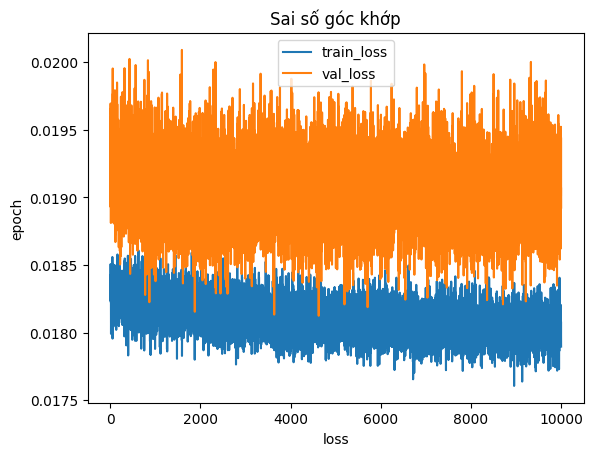

In [7]:
import matplotlib.pyplot as plt

plt.title('Sai số góc khớp')
plt.xlabel('loss')
plt.ylabel('epoch')

plt.plot(loss_tr, label='train_loss')
plt.plot(loss_va, label='val_loss')
plt.legend()

plt.show()

In [8]:
the_model = ANN()
the_model.load_state_dict(torch.load(PATH))
test_arr = torch.tensor([Val_X[:10]],dtype=torch.float32)
print(Val_y[:10])
test_arr
# test_arr*400

[[1.91986218 0.75049158 1.29154365 0.31415927]
 [1.29154365 0.52359878 0.83775804 0.27925268]
 [2.14675498 0.40142573 1.20427718 0.26179939]
 [2.14675498 0.54105207 1.18682389 0.27925268]
 [1.74532925 0.40142573 0.97738438 0.33161256]
 [1.60570291 0.78539816 1.13446401 0.27925268]
 [1.67551608 0.9250245  1.30899694 0.31415927]
 [1.97222205 0.75049158 1.04719755 0.33161256]
 [1.91986218 0.36651914 0.87266463 0.27925268]
 [1.67551608 0.82030475 1.11701072 0.27925268]]


C:\Users\Hero\AppData\Local\Temp\ipykernel_11324\2902516995.py:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:248.)
  test_arr = torch.tensor([Val_X[:10]],dtype=torch.float32)


tensor([[[0.0000, 0.3850, 0.4000, 0.7275, 0.3350, 0.3700, 0.6650, 0.6150],
         [0.0275, 0.2300, 0.4625, 0.5400, 0.4025, 0.1050, 0.7525, 0.3750],
         [0.4450, 0.5450, 0.9725, 0.9025, 0.5725, 0.5025, 1.0000, 0.8325],
         [0.0050, 0.5700, 0.6300, 0.9975, 0.2525, 0.5050, 0.6900, 0.8025],
         [0.0100, 0.5650, 0.6875, 0.9975, 0.2650, 0.5050, 0.7100, 0.7950],
         [0.5050, 0.2575, 0.9400, 0.6350, 0.7900, 0.2550, 0.9975, 0.6050],
         [0.3375, 0.1325, 0.9700, 0.6000, 0.4250, 0.2175, 0.9025, 0.5525],
         [0.0000, 0.2950, 0.3375, 0.5450, 0.4900, 0.2800, 0.7825, 0.4850],
         [0.0125, 0.5625, 0.6800, 0.9975, 0.2650, 0.5050, 0.7050, 0.8000],
         [0.0150, 0.5700, 0.6775, 1.0000, 0.2650, 0.5100, 0.7075, 0.8100]]])

In [10]:
output = the_model(test_arr)
ou = np.array(output.detach().numpy()[0],dtype=np.int8)
# output[0]
ou
# print(donghocnguoc(11,-3,3))
# donghocthuan(np.array([168, 130, -52, 17], dtype=np.float16)*np.pi/180)


array([[1, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 1, 0],
       [1, 0, 1, 0],
       [1, 0, 1, 0],
       [1, 0, 1, 0],
       [1, 1, 1, 0],
       [2, 0, 1, 0],
       [1, 0, 1, 0],
       [1, 0, 1, 0]], dtype=int8)

# Visualize